# Example notebook showing how to interactively use the Spectrum Analysis class

## Define ON region

In [91]:
from gammapy.region import SkyCircleRegion
from astropy.coordinates import SkyCoord, Angle

center = SkyCoord(80.63, 22.01, unit='deg', frame='icrs')
radius = Angle('0.3 deg')
on_region = SkyCircleRegion(pos = center, radius = radius)
print(on_region.to_ds9())


icrs; circle(183.032932761,-8.12136056874,0.3)



## Define background method

In [8]:
bkg_method = dict(type='reflected')

## Define Energy binning

In [10]:
from gammapy.spectrum import EnergyBounds

bounds = EnergyBounds.equal_log_spacing(1,10,40, unit='TeV')

## Make exclusion mask

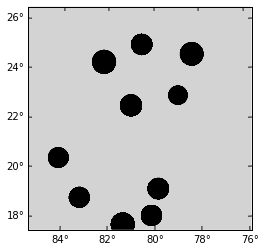

In [95]:
%matplotlib inline
from gammapy.image import ExclusionMask, make_empty_image
from astropy.wcs import WCS
import matplotlib.pyplot as plt

hdu = make_empty_image(nxpix = 901, nypix =901, binsz=0.01, coordsys='CEL',
                       xref=on_region.pos.ra.value, yref=on_region.pos.dec.value )
wcs = WCS(hdu.header)
mask = ExclusionMask.create_random(hdu, n=10, min_rad=50)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=wcs)
mask.plot(ax)
plt.show()

## Define Data

In [50]:
obs = [23523, 23559]
nobs = 2
store = 'crab_example'

## Make Spectrum Analysis instance

In [97]:
from gammapy.spectrum.spectrum_analysis import SpectrumAnalysis

ana = SpectrumAnalysis(datastore = store, obs = obs, on_region = on_region,
                       bkg_method = bkg_method, exclusion = mask, 
                       nobs = nobs, ebounds = bounds)

In [1]:
ana?

Object `ana` not found.


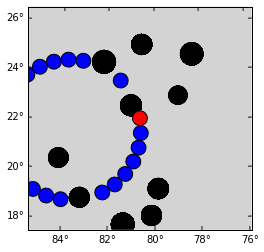

In [99]:
regs = ana.observations[0].make_reflected_regions()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=wcs)
mask.plot(ax)
for reg in regs:
    p = reg.plot(ax, facecolor='blue')
    ax.add_patch(p)
pp = on_region.plot(ax, facecolor='red')
ax.add_patch(pp)
plt.show()